# Credit EDA 

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**NOTE - Please change the reading directory of the dataset in the below query as per your requirments**

In [2]:
# Reading dataset from computer

df=pd.read_csv(r"application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
# Determining the shape  and other attribute of the datset

df.shape

(307511, 122)

In [4]:
df.describe


<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [5]:
df.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [6]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycols=df.isnull().sum()
emptycols=emptycols[emptycols.values>(0.3*len(emptycols))]
len(emptycols)


64

So, there are 64 columns having null values greater than 30% 

In [8]:
# Removing those 64 columns
emptycols = list(emptycols[emptycols.values>=0.3].index)
df.drop(labels=emptycols,axis=1,inplace=True)
print(len(emptycols))

64


In [9]:
# Checking the columns having less null percentage

df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean hence we will fill those missing banks with median value


In [10]:
# Filling missing values with median

values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [11]:
# Searching for the column for null values

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now, all columns have been with zero null values

In [12]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [13]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [14]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...           -2120                  WEDNESDAY                      10   
1  ...            -291                     MONDAY                      11   
2  ...           -2531                     MONDAY                       9   
3  ...           -2437                  WEDNESDAY                      17   
4  ...           -3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

There are some columns where the value is mentioned as 'XNA'(Not Available).we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [15]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column

df[df['CODE_GENDER']=='XNA'].shape

(4, 28)

In [16]:
# For Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

So, there are 4 rows from Gender column and 55374 rows from Organization type column 

In [17]:
# Describing the Gender column to check the number of females and males

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [18]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
# Describing the organization type column

df['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [20]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [21]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...           -2120                  WEDNESDAY                      10   
1  ...            -291                     MONDAY                      11   
2  ...           -2531                     MONDAY                       9   
3  ...           -2437                  WEDNESDAY                      17   
4  ...           -3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

------------------------------------------------

**Derived Metrics**

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [22]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [23]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [24]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]


In [25]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

The Imbalance ratio is 10.55

**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

In [26]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

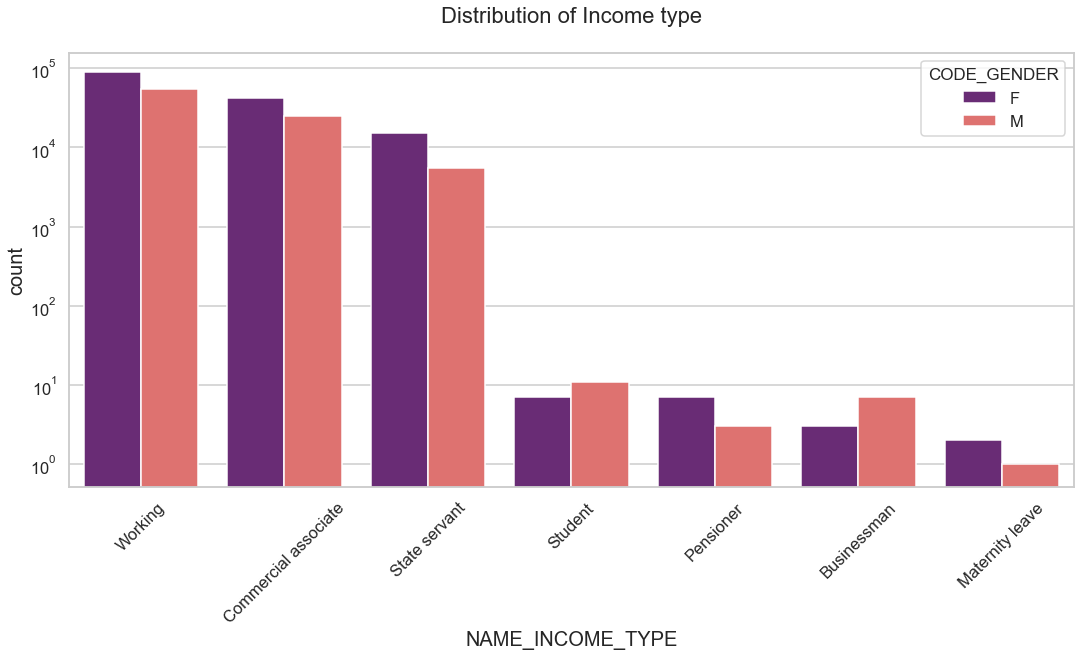

In [27]:
# Plotting for Income type

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

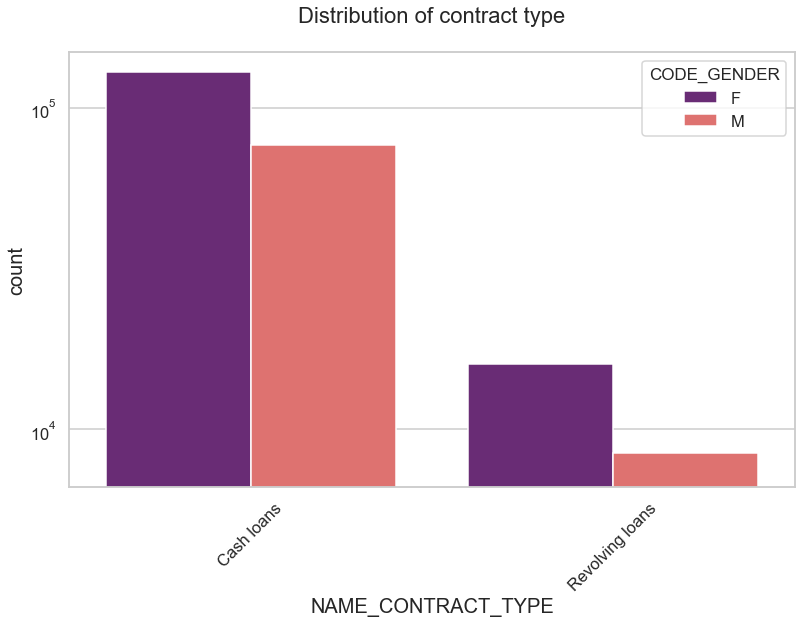

In [28]:
# Plotting for Contract type

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

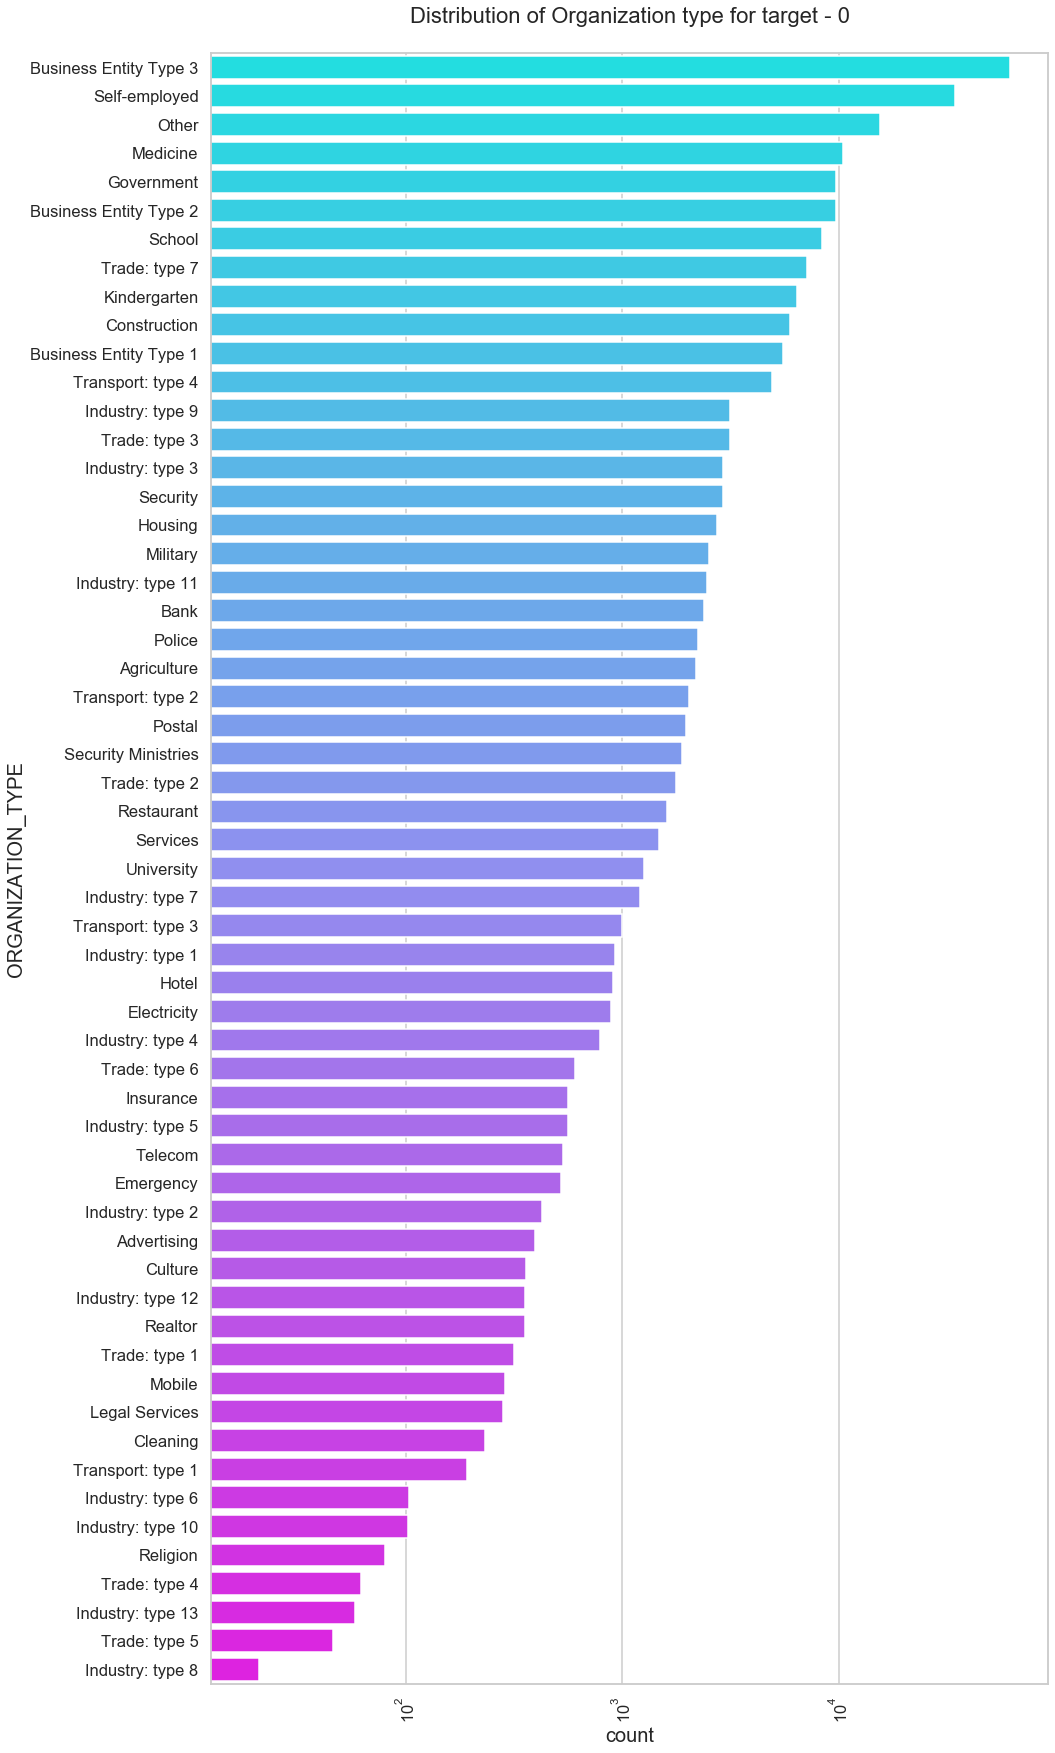

In [29]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

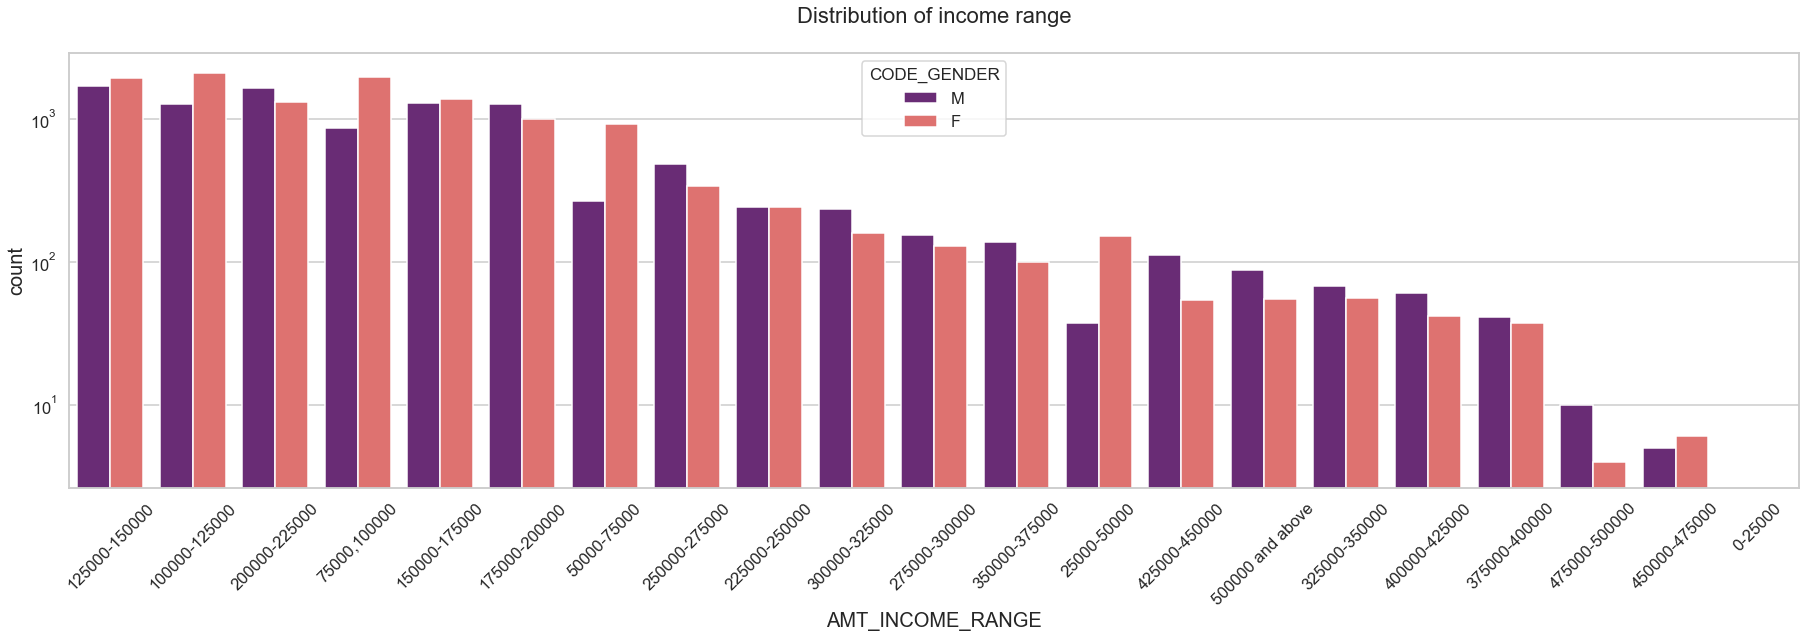

In [30]:
# PLotting for income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.


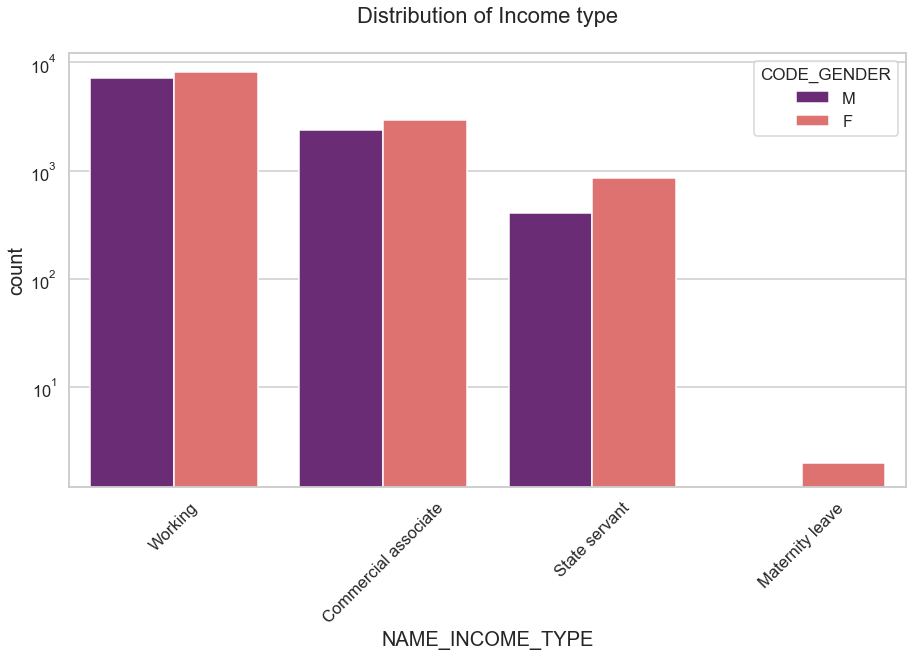

In [31]:
# Plotting for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

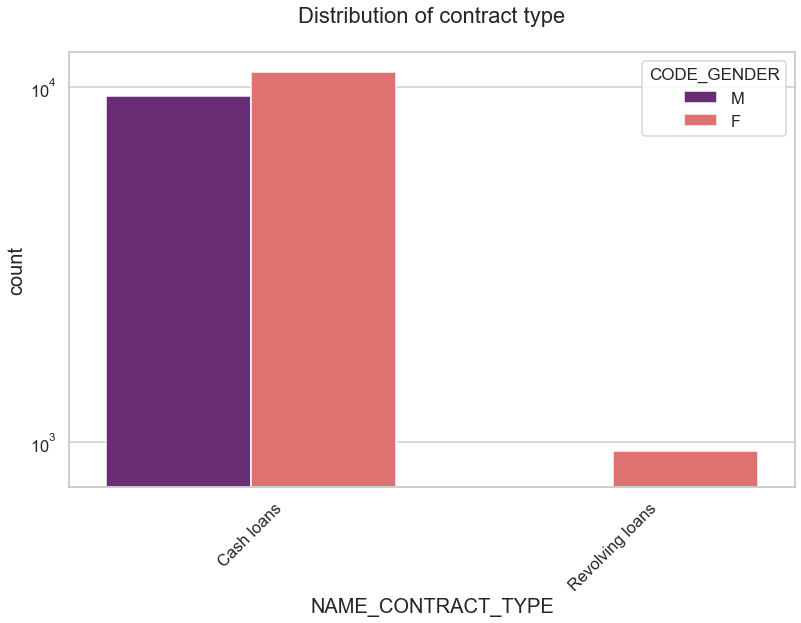

In [32]:
# Plotting for Contract type

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

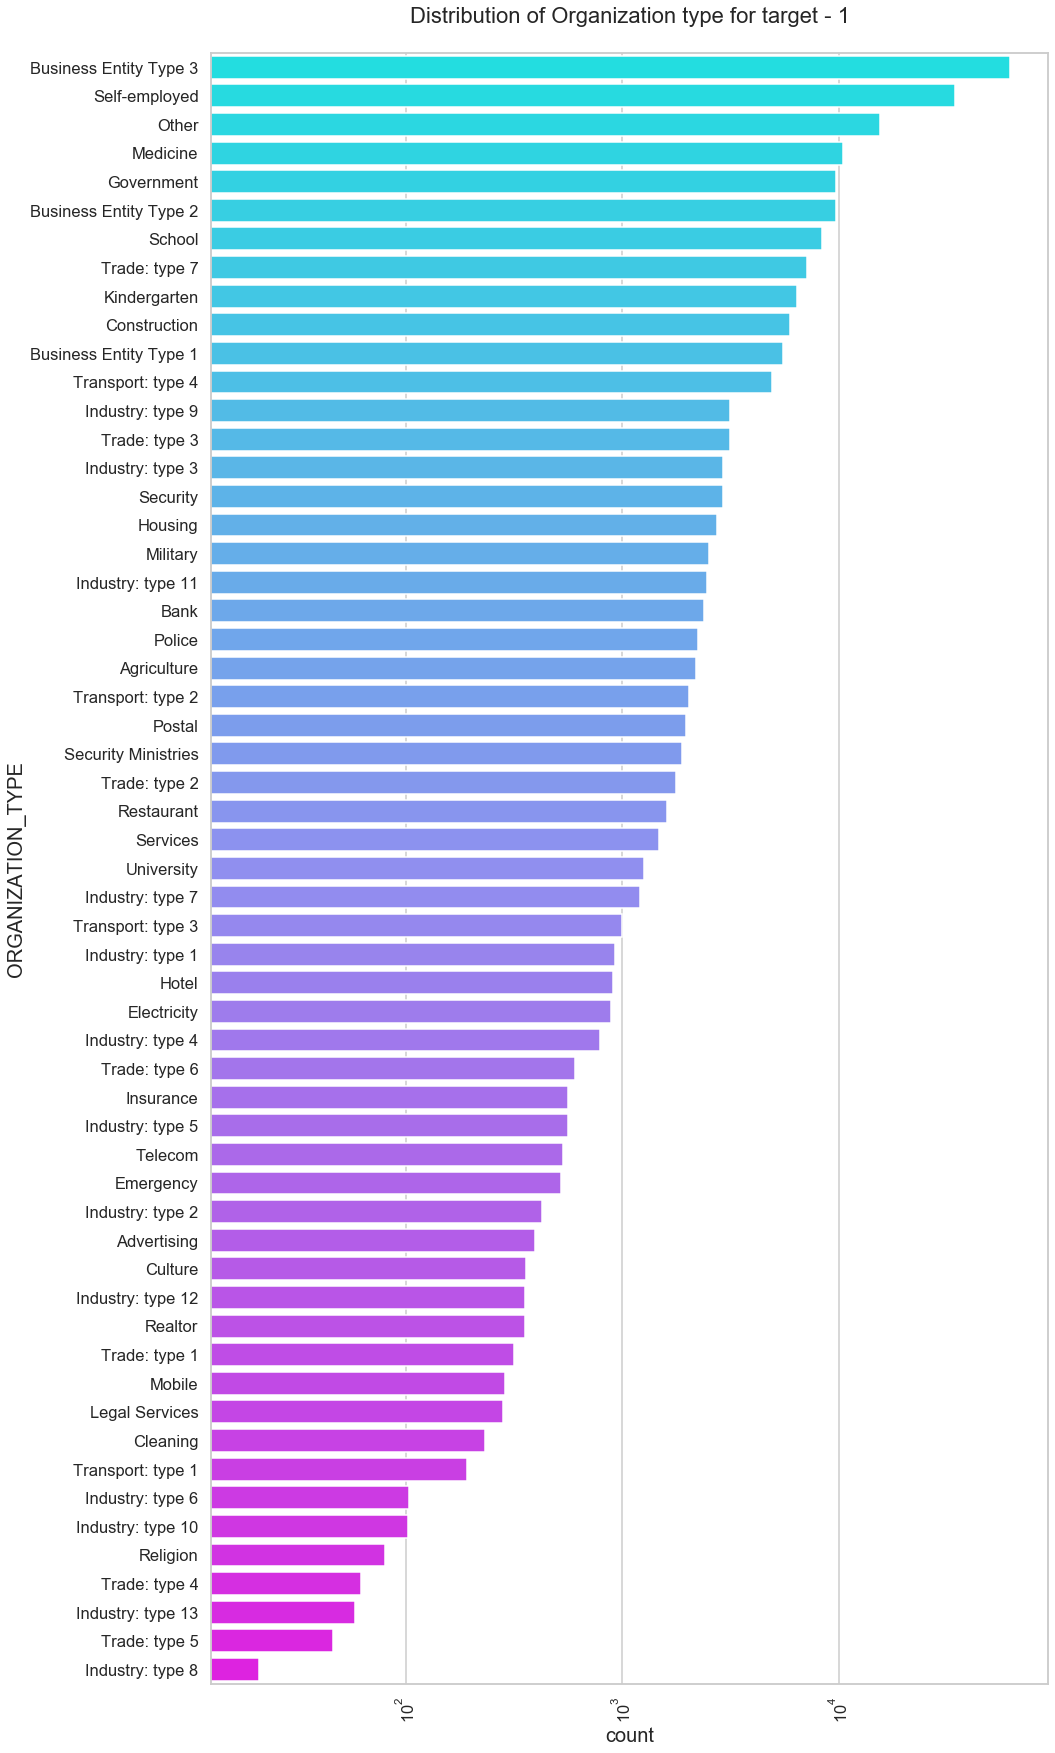

In [33]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

## Points to be concluded from the above graph.

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
Same as type 0 in distribution of organization type.

## Correlation Between Target 0 and Target 1 

In [34]:
target0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     230302 non-null int64
TARGET                         230302 non-null int64
NAME_CONTRACT_TYPE             230302 non-null object
CODE_GENDER                    230302 non-null object
FLAG_OWN_CAR                   230302 non-null object
FLAG_OWN_REALTY                230302 non-null object
CNT_CHILDREN                   230302 non-null int64
AMT_INCOME_TOTAL               230302 non-null float64
AMT_CREDIT                     230302 non-null float64
AMT_ANNUITY                    230302 non-null float64
NAME_INCOME_TYPE               230302 non-null object
NAME_EDUCATION_TYPE            230302 non-null object
NAME_FAMILY_STATUS             230302 non-null object
NAME_HOUSING_TYPE              230302 non-null object
REGION_POPULATION_RELATIVE     230302 non-null float64
DAYS_BIRTH                     230302 non-null int64
DAYS_EMPLOYED            

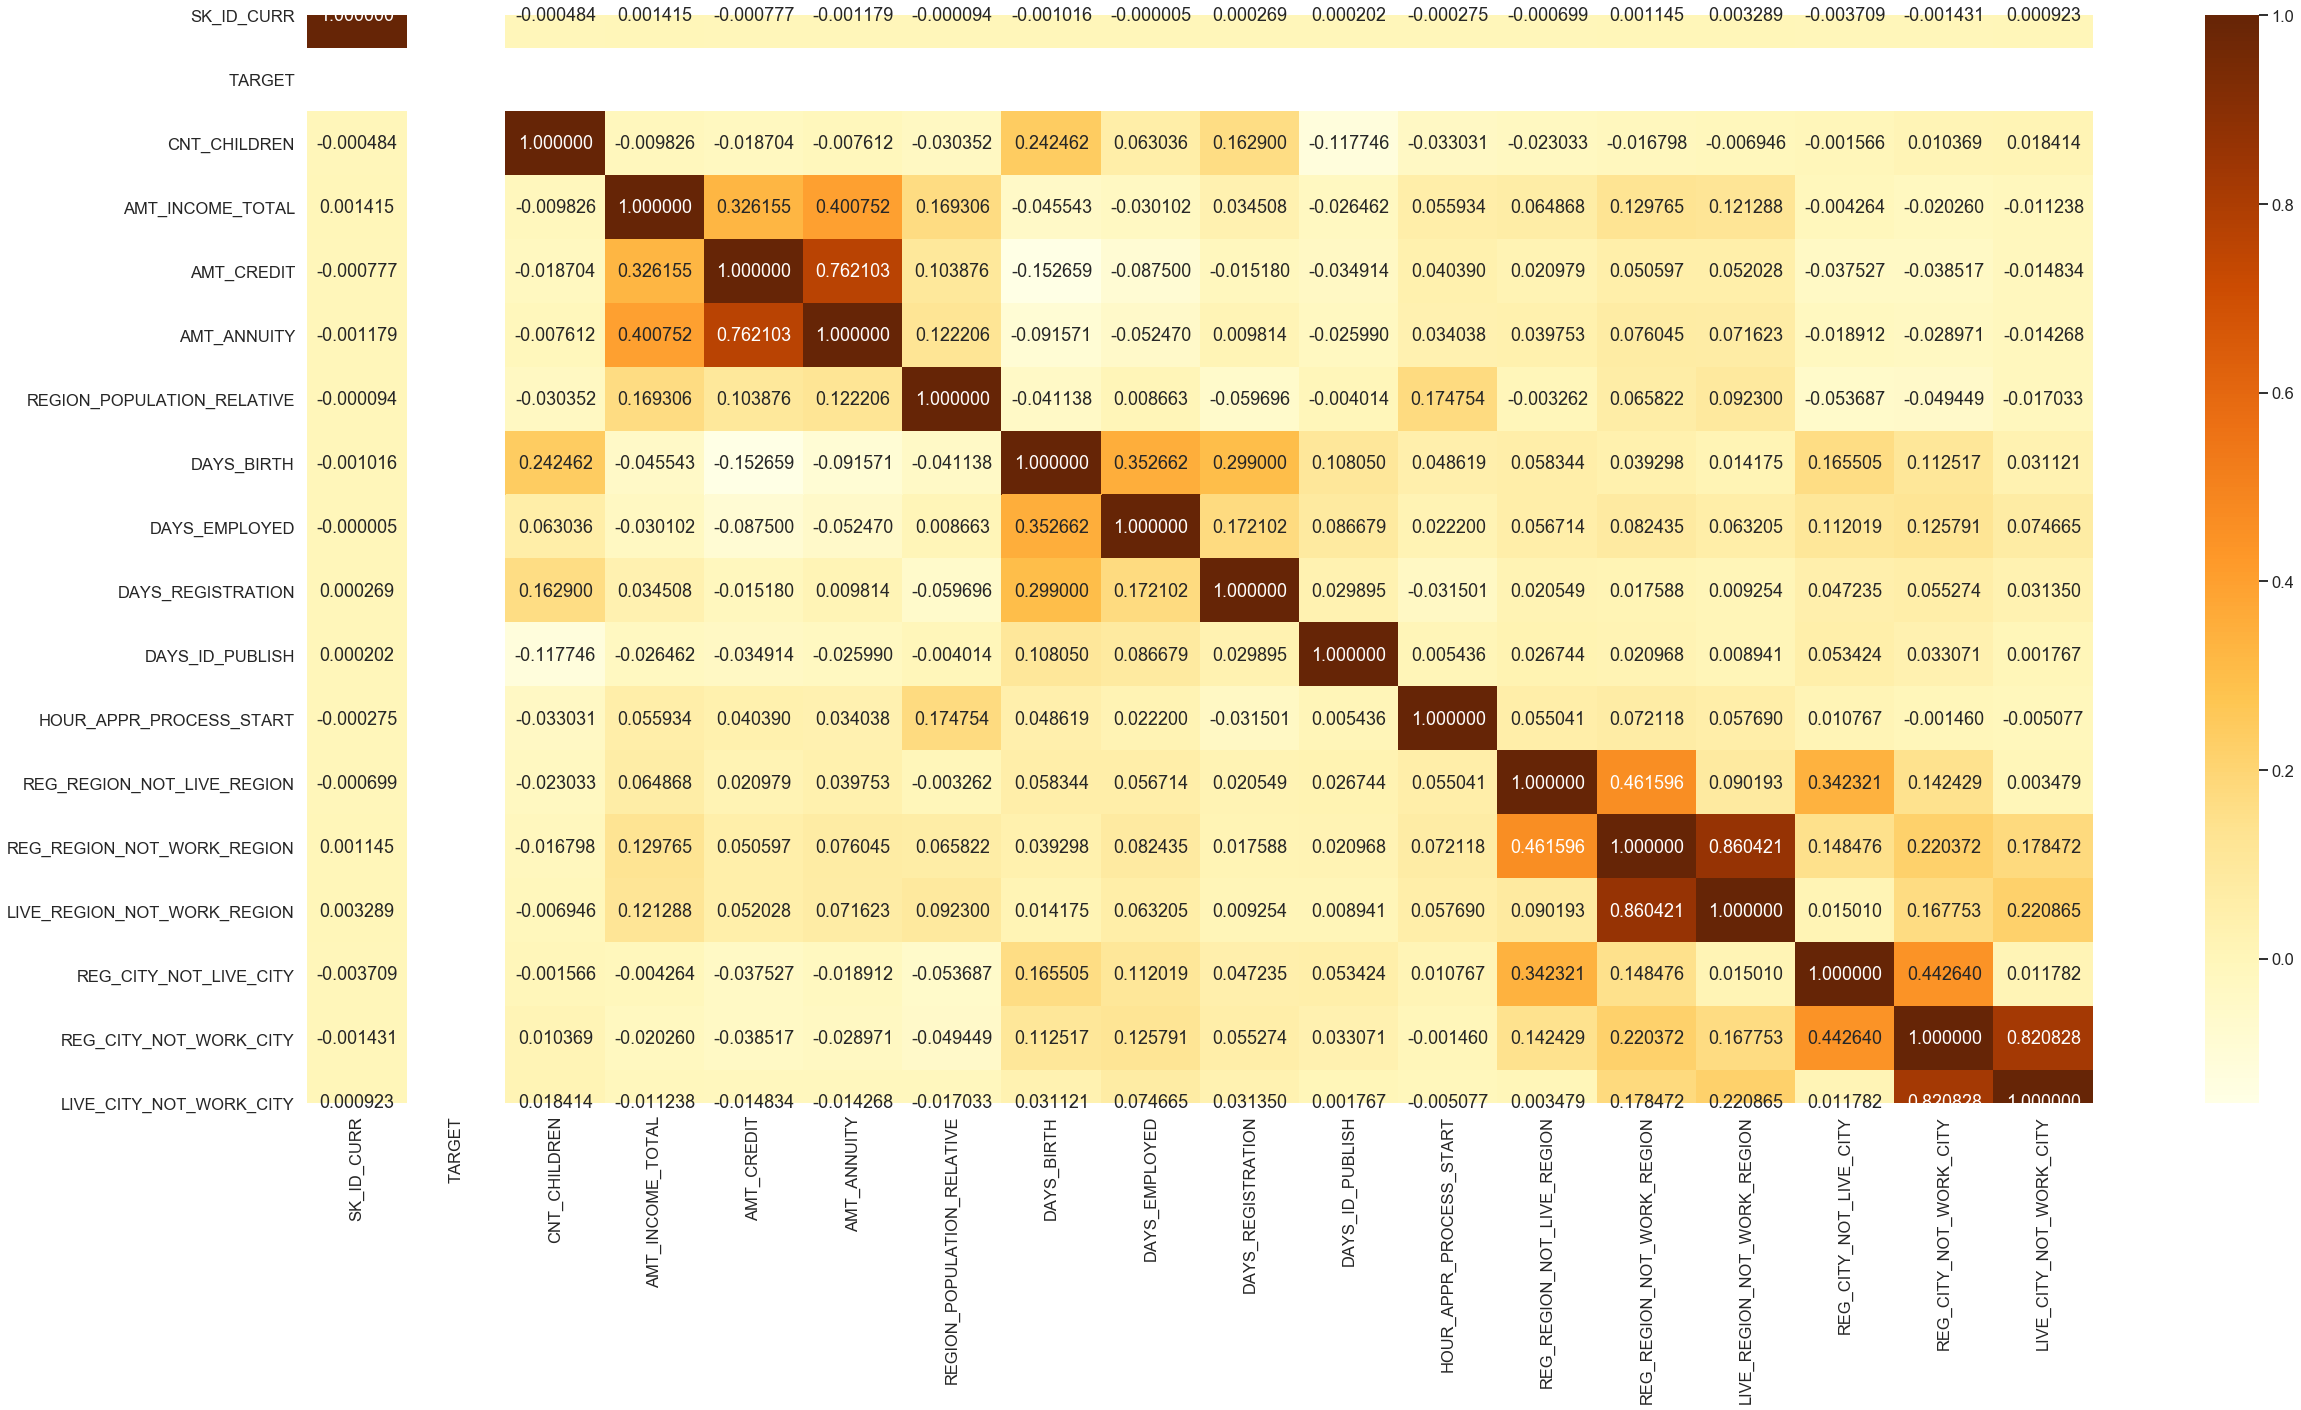

In [35]:
#Correlation of Target0 dataset
plt.figure(figsize=[40,20])
sns.heatmap(target0_df.corr(), cmap="YlOrBr", annot=True , fmt='f')


### As we can see from above correlation heatmap, There are number of observation we can point out

#### Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
#### Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
#### Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
#### less children client have in densely populated area.
#### Credit amount is higher to densely populated area.
#### The income is also higher in densely populated area.

In [36]:
target1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 307509
Data columns (total 30 columns):
SK_ID_CURR                     21835 non-null int64
TARGET                         21835 non-null int64
NAME_CONTRACT_TYPE             21835 non-null object
CODE_GENDER                    21835 non-null object
FLAG_OWN_CAR                   21835 non-null object
FLAG_OWN_REALTY                21835 non-null object
CNT_CHILDREN                   21835 non-null int64
AMT_INCOME_TOTAL               21835 non-null float64
AMT_CREDIT                     21835 non-null float64
AMT_ANNUITY                    21835 non-null float64
NAME_INCOME_TYPE               21835 non-null object
NAME_EDUCATION_TYPE            21835 non-null object
NAME_FAMILY_STATUS             21835 non-null object
NAME_HOUSING_TYPE              21835 non-null object
REGION_POPULATION_RELATIVE     21835 non-null float64
DAYS_BIRTH                     21835 non-null int64
DAYS_EMPLOYED                  21835 non-n

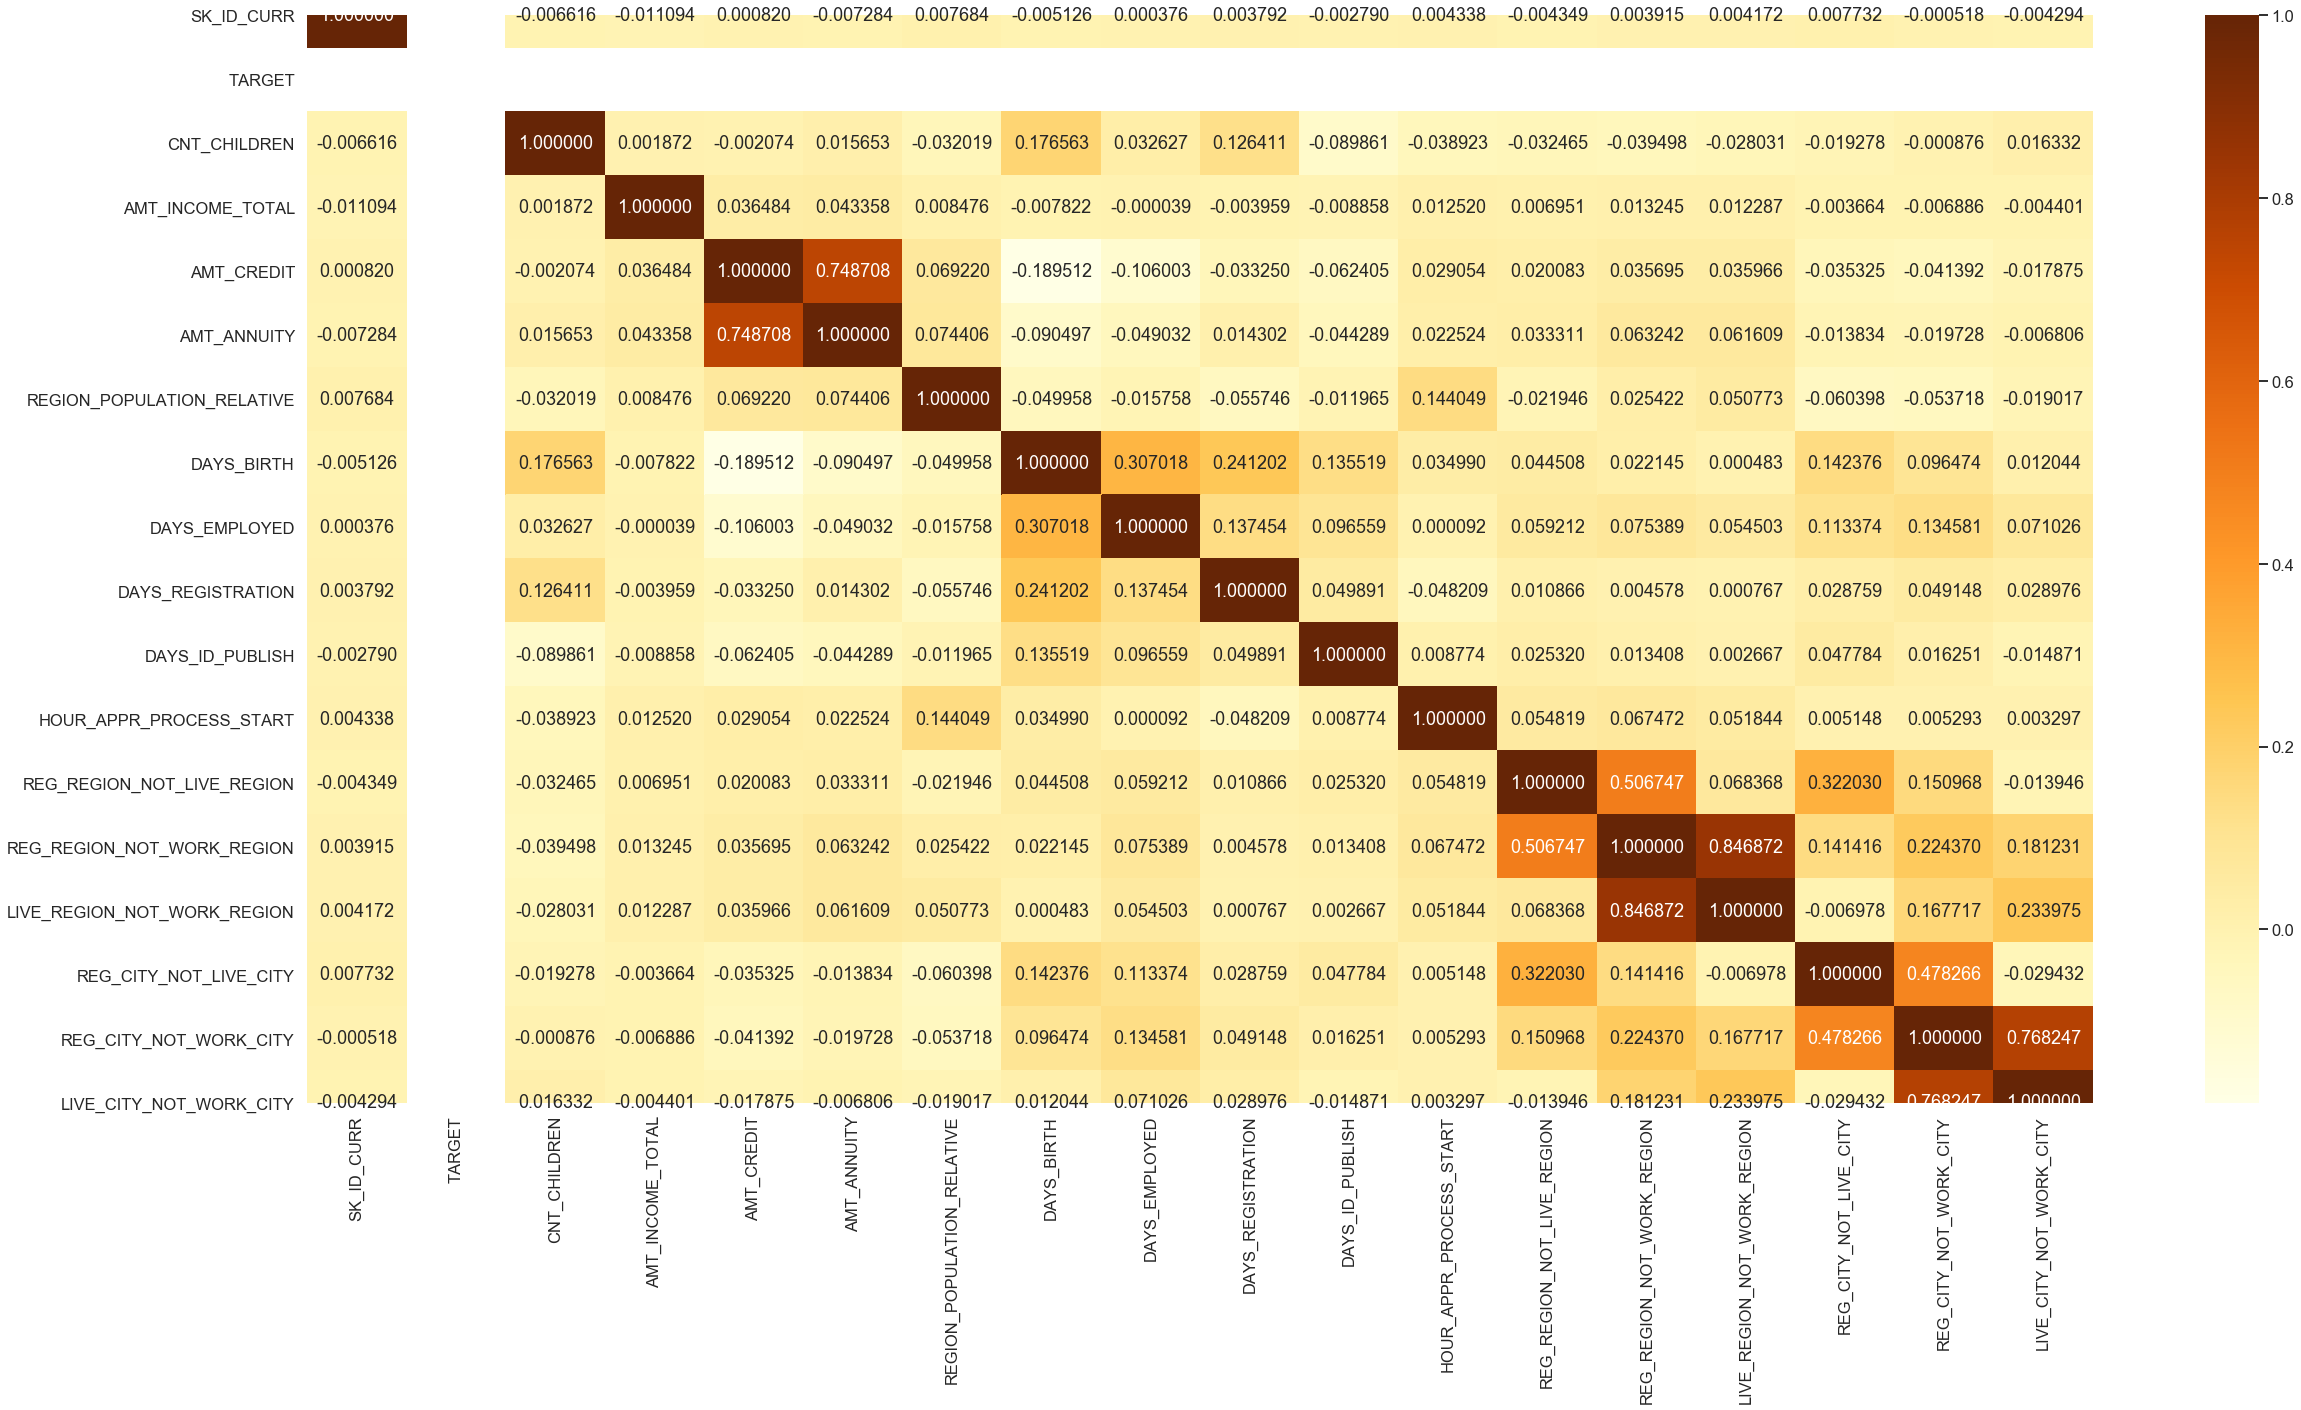

In [37]:
#Correlation of target 1 
plt.figure(figsize=[40,20])
sns.heatmap(target1_df.corr(), cmap="YlOrBr", annot=True , fmt='f')

##This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

The client's permanent address does not match contact address are having less children and vice-versa
the client's permanent address does not match work address are having less children and vice-versa

## Univariate analysis for variables

In [38]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()
    

**For Target 0 - Finding any outliers** 

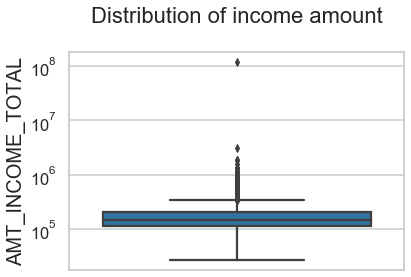

In [39]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.

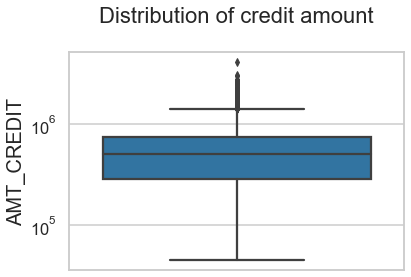

In [40]:
# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.


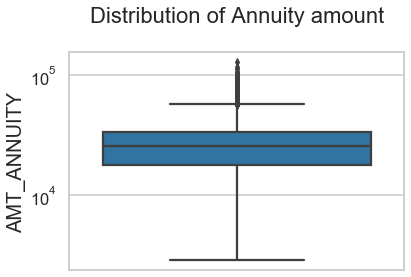

In [41]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### For Target 1 - Finding any outliers

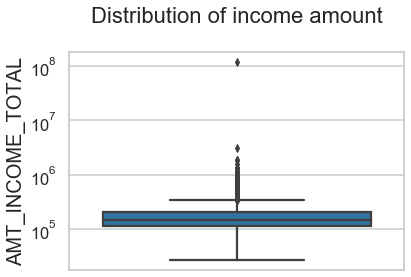

In [42]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.
Most of the clients of income are present in first quartile.

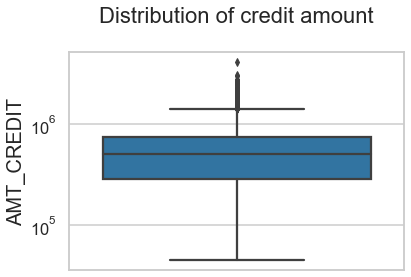

In [43]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

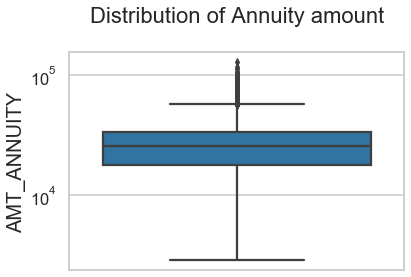

In [44]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

## Bivariate analysis for numerical variables For Target 0

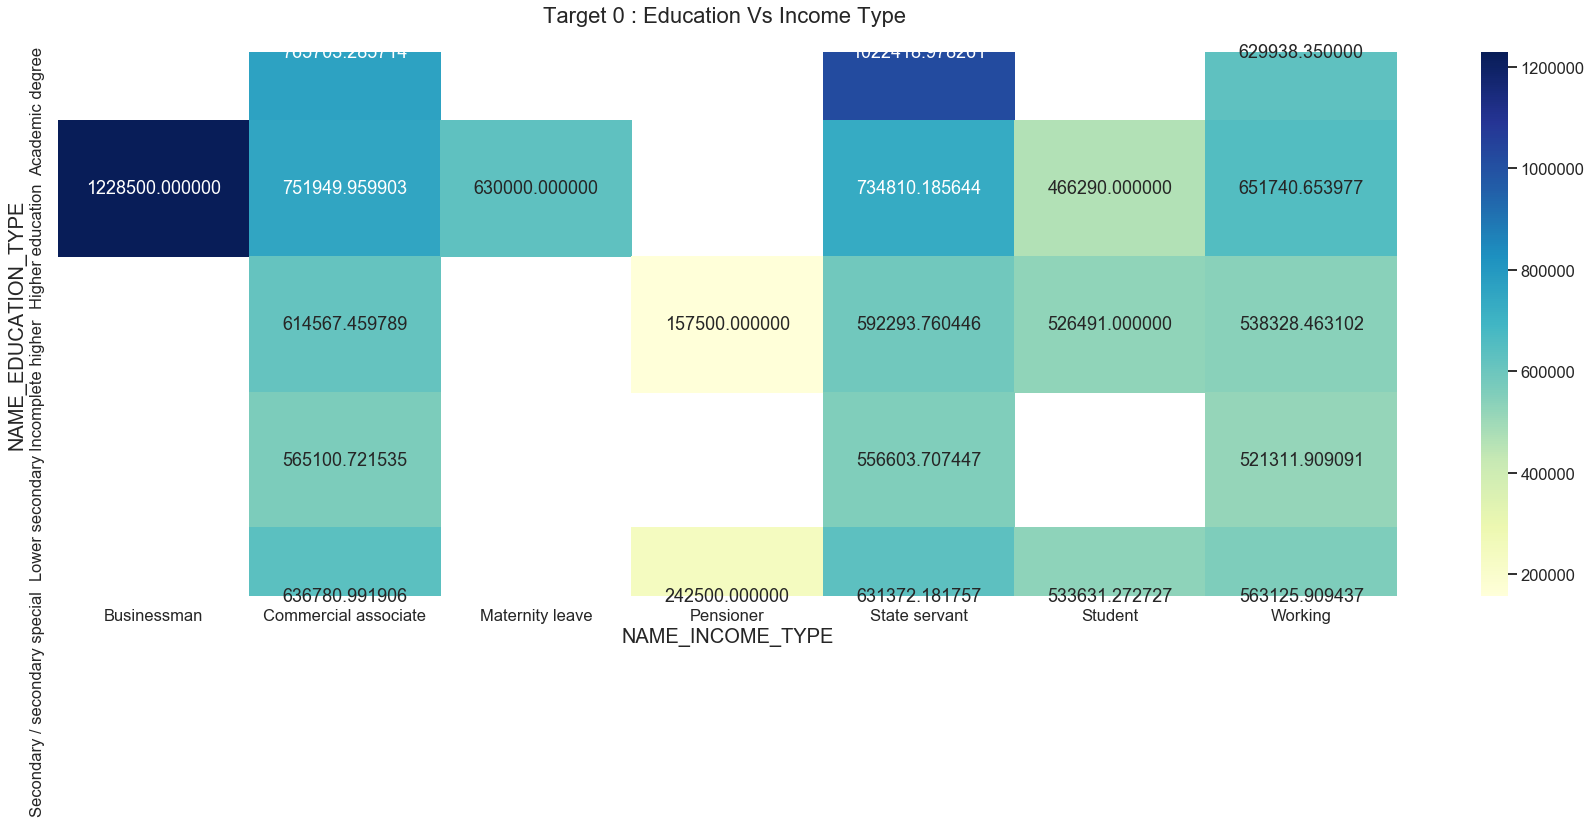

In [45]:
#Target 0 : Education Vs Income Type
plt.figure(figsize=[30,10])

Edu_Income_t0= pd.pivot_table(data=target0_df, index ="NAME_EDUCATION_TYPE",columns = "NAME_INCOME_TYPE", values='AMT_CREDIT')
sns.heatmap(Edu_Income_t0, annot= True ,cmap="YlGnBu", fmt ='f' )
plt.title("Target 0 : Education Vs Income Type ")
plt.show()

From the above graph, we can infer that Businessman with higher education have got more loan credit than any other category whereas pensioner with Incomplete higher education being the least.

In [46]:
target1_df.nunique()

SK_ID_CURR                     21835
TARGET                             1
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                       9
AMT_INCOME_TOTAL                 346
AMT_CREDIT                      2383
AMT_ANNUITY                     5632
NAME_INCOME_TYPE                   4
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        80
DAYS_BIRTH                     10643
DAYS_EMPLOYED                   5399
DAYS_REGISTRATION               9131
DAYS_ID_PUBLISH                 5305
WEEKDAY_APPR_PROCESS_START         7
HOUR_APPR_PROCESS_START           24
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
LIVE_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
O

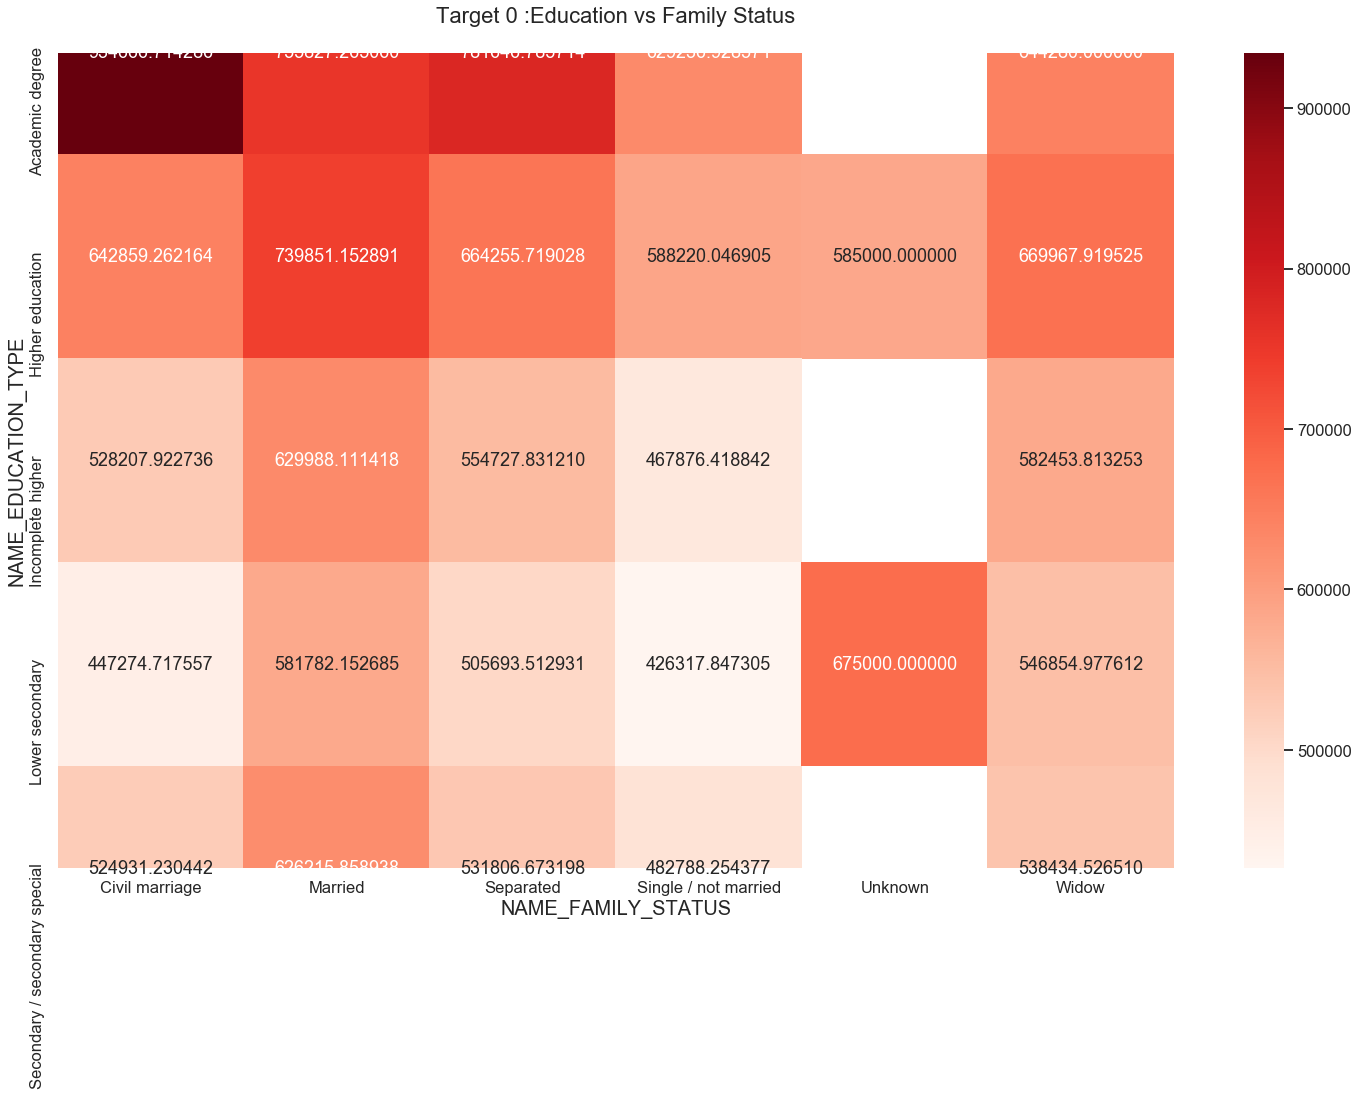

In [47]:
#Target 0 :Education vs Family Status
plt.figure(figsize=[25,15])
Edu_fam_t0 = pd.pivot_table(data=target0_df, index ="NAME_EDUCATION_TYPE",columns = "NAME_FAMILY_STATUS", values='AMT_CREDIT')
sns.heatmap(Edu_fam_t0, annot= True ,cmap="Reds" , fmt ='f')
plt.title("Target 0 :Education vs Family Status")
plt.show()

From the above graph, we can infer that Civil marriage with academic degree category getting the highest credit while single/not married with lower secondary education being the least.

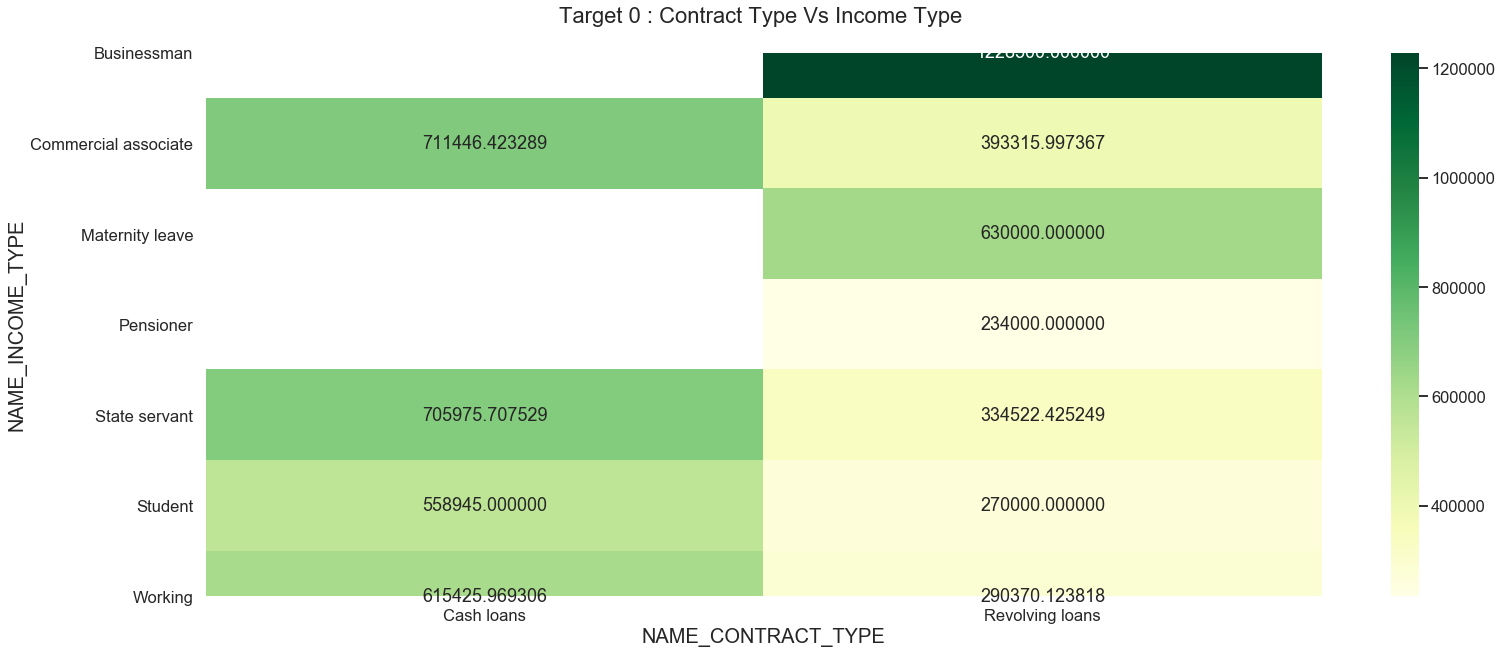

In [48]:
#Target 0 : Contract Type Vs Income Type 
plt.figure(figsize=[25,10])
Contract_Income_t0 = pd.pivot_table(data=target0_df, index ="NAME_INCOME_TYPE",columns = "NAME_CONTRACT_TYPE", values='AMT_CREDIT')
sns.heatmap( Contract_Income_t0, annot= True ,cmap="YlGn" ,fmt ='f')
plt.title("Target 0 : Contract Type Vs Income Type ")
plt.show()

From the above graph , we can infer that Businessman get the most credit for resolving loans while pensioners get the least credit for resolving loans. We can also infer that except Businessman all Income type prefer Cash loans over resolving loans. 

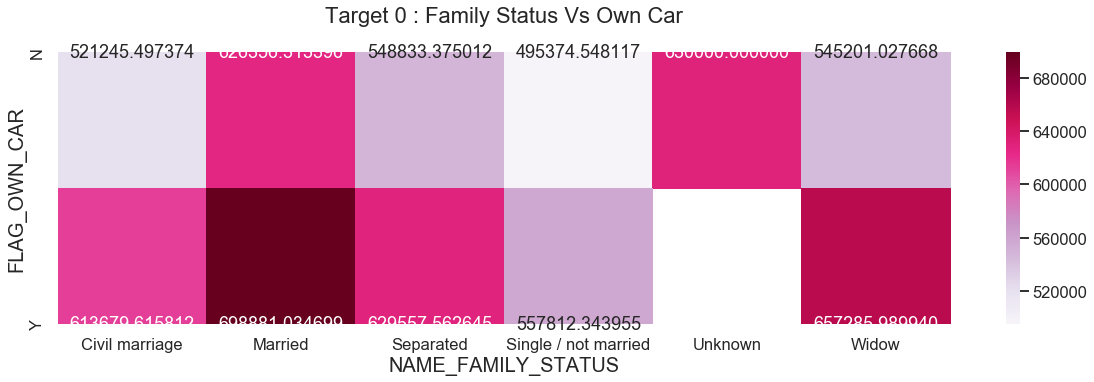

In [49]:
#Target 0 : Family Status Vs Own Car
plt.figure(figsize=[20,5])
Family_car_t0=pd.pivot_table(data=target0_df, index ="FLAG_OWN_CAR",columns = "NAME_FAMILY_STATUS", values='AMT_CREDIT')
plt.title('Target 0 : Family Status Vs Own Car')
sns.heatmap(Family_car_t0, annot= True ,cmap="PuRd" , fmt ='f' )
plt.show()

## Bivariate analysis for Target 1

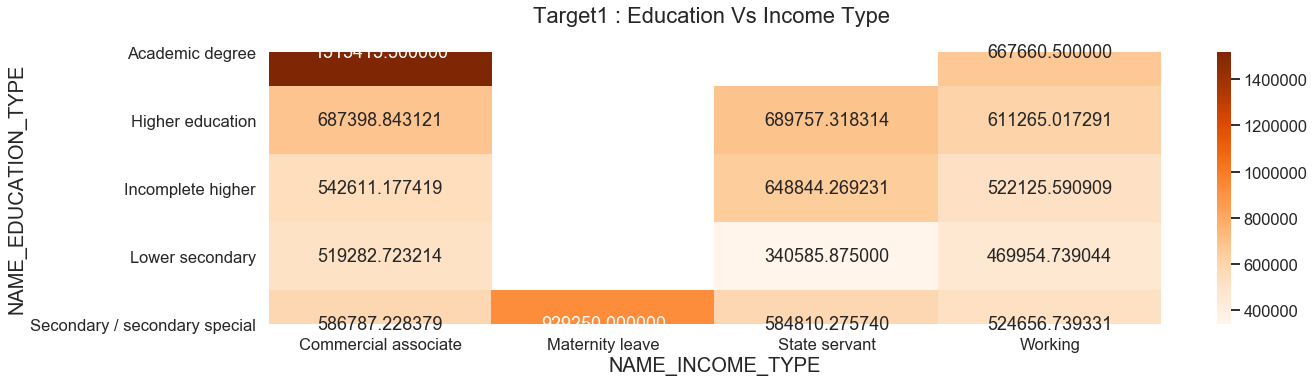

In [50]:
#Target1 : Education Vs Income Typ
plt.figure(figsize=[20,5])
edu_income_t1=pd.pivot_table(data=target1_df, index ="NAME_EDUCATION_TYPE",columns = "NAME_INCOME_TYPE", values='AMT_CREDIT')
plt.title('Target1 : Education Vs Income Type ')
sns.heatmap(edu_income_t1, annot= True ,cmap="Oranges", fmt ='f' )
plt.show()

From the above map, we can infer that commercial associate with Academic degree get the highest credit while State servant with lower education get the least credit.

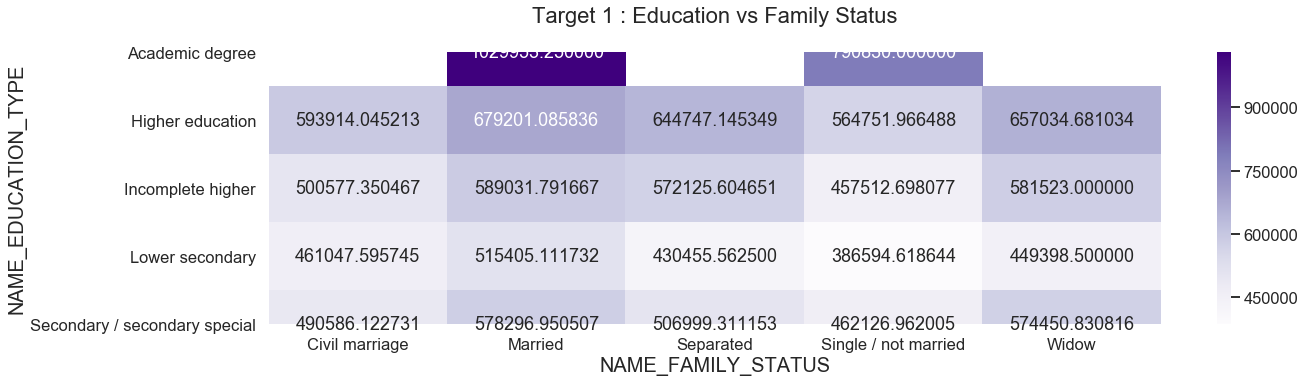

In [51]:
#Target 1 : Education vs Family Status
plt.figure(figsize=[20,5])
Edu_fam_t1 = pd.pivot_table(data=target1_df, index ="NAME_EDUCATION_TYPE",columns = "NAME_FAMILY_STATUS", values='AMT_CREDIT')
sns.heatmap(Edu_fam_t1, annot= True ,cmap="Purples", fmt ='f' )
plt.title("Target 1 : Education vs Family Status")
plt.show()

From the above map, we can infer that married people with Academic degree get the highest credit while Single/not married with lower education get the least credit.

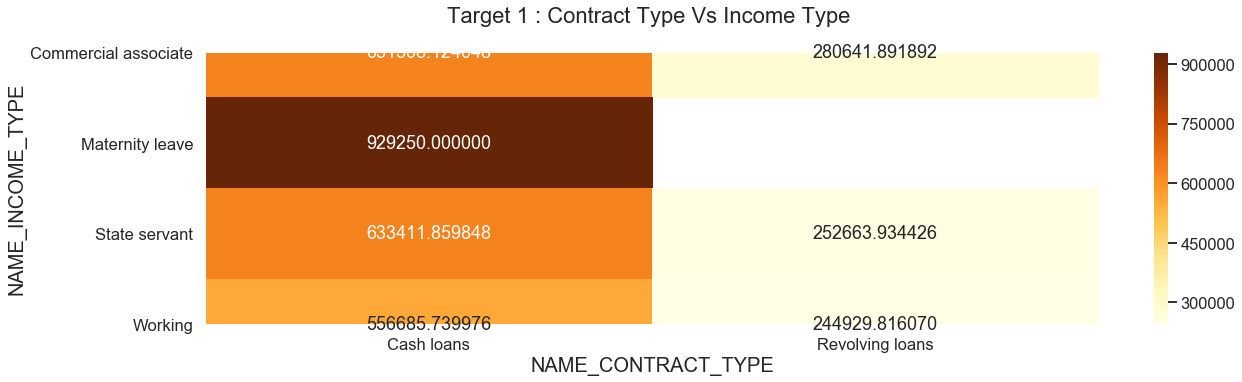

In [52]:
#Target 1 : Contract Type Vs Income Type
plt.figure(figsize=[20,5])
Income_Contract_t1 = pd.pivot_table(data=target1_df, index ="NAME_INCOME_TYPE",columns = "NAME_CONTRACT_TYPE", values='AMT_CREDIT')
sns.heatmap( Income_Contract_t1, annot= True ,cmap="YlOrBr" ,fmt ='f')
plt.title("Target 1 : Contract Type Vs Income Type ")
plt.show()

From the above map, we can infer that Maternity leave get maximum credit for cash loans  while Working get the least credit for resolving loans. 

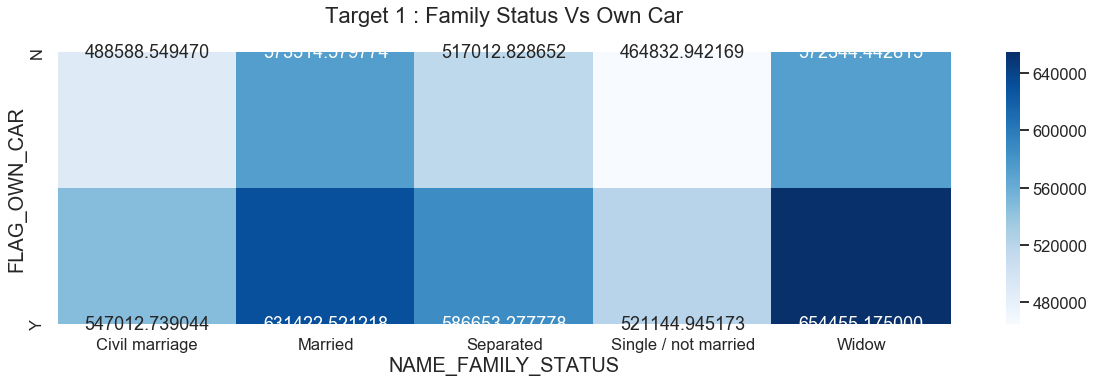

In [53]:
#Target 1 : Family Status Vs Own Car
plt.figure(figsize=[20,5])
Family_car_t1=pd.pivot_table(data=target1_df, index ="FLAG_OWN_CAR",columns = "NAME_FAMILY_STATUS", values='AMT_CREDIT')
plt.title('Target 1 : Family Status Vs Own Car')
sns.heatmap(Family_car_t1, annot= True ,cmap="Blues", fmt= 'f' )
plt.show()

From the above map, we can infer that window with own car get the highest credit while single/not working with no own car get the least credit.

# Comparing with Previous application dataset

In [54]:
df1=  pd.read_csv(r"previous_application.csv")


In [55]:
#check the shape and other attribute of data set
df1.shape


(1670214, 37)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [57]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [58]:
df1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [59]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [60]:
# Cleaning the missing data

# listing the null values columns having more than 30%
empty=df1.isnull().sum()
empty=empty[empty.values>(0.3*len(empty))]
len(empty)

15

In [61]:
# Removing those 15 columns
empt = list(empty[empty.values>=0.3].index)
df1.drop(labels=empt,axis=1,inplace=True)
print(len(empt))

15


In [62]:
df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [63]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [64]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 51 columns):
SK_ID_CURR                     51420 non-null int64
TARGET                         51420 non-null int64
NAME_CONTRACT_TYPE_            51420 non-null object
CODE_GENDER                    51420 non-null object
FLAG_OWN_CAR                   51420 non-null object
FLAG_OWN_REALTY                51420 non-null object
CNT_CHILDREN                   51420 non-null int64
AMT_INCOME_TOTAL               51420 non-null float64
AMT_CREDIT_                    51420 non-null float64
AMT_ANNUITY                    51420 non-null float64
NAME_INCOME_TYPE               51420 non-null object
NAME_EDUCATION_TYPE            51420 non-null object
NAME_FAMILY_STATUS             51420 non-null object
NAME_HOUSING_TYPE              51420 non-null object
REGION_POPULATION_RELATIVE     51420 non-null float64
DAYS_BIRTH                     51420 non-null int64
DAYS_EMPLOYED                  51420 non-nu

In [65]:
# Renaming the column names after merging

combined = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [66]:
# Removing unwanted columns for analysis

combined.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

# Univariate Anlaysis

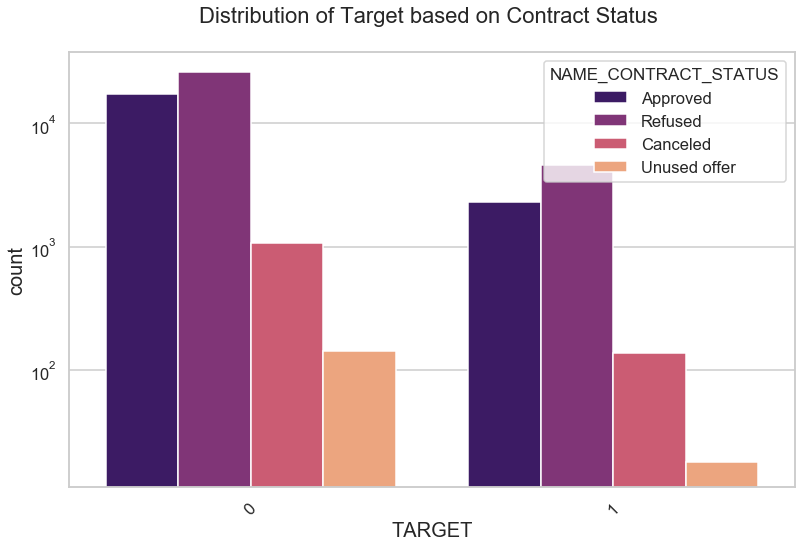

In [67]:
#COMPARING TARGET WITH CONTRACT STATUS 
uniplot(combined,col='TARGET',title='Distribution of Target based on Contract Status ',hue='NAME_CONTRACT_STATUS')

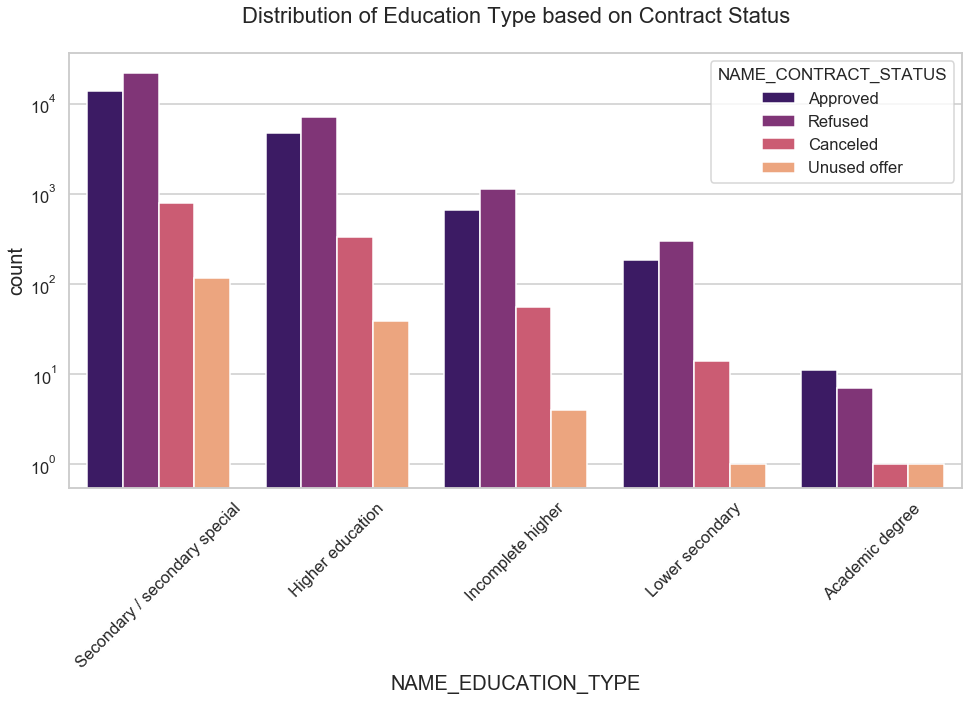

In [68]:
#COMPARING EDUCATION TYPE WITH CONTRACT STATUS 
uniplot(combined,col='NAME_EDUCATION_TYPE',title='Distribution of Education Type based on Contract Status',hue='NAME_CONTRACT_STATUS')

From the above two plots, we can infer that people with Secondary/secondary special have the highest number of approved loans. 

We can also see that people with Academic degree have significantly more refused loans than cancelled loans.

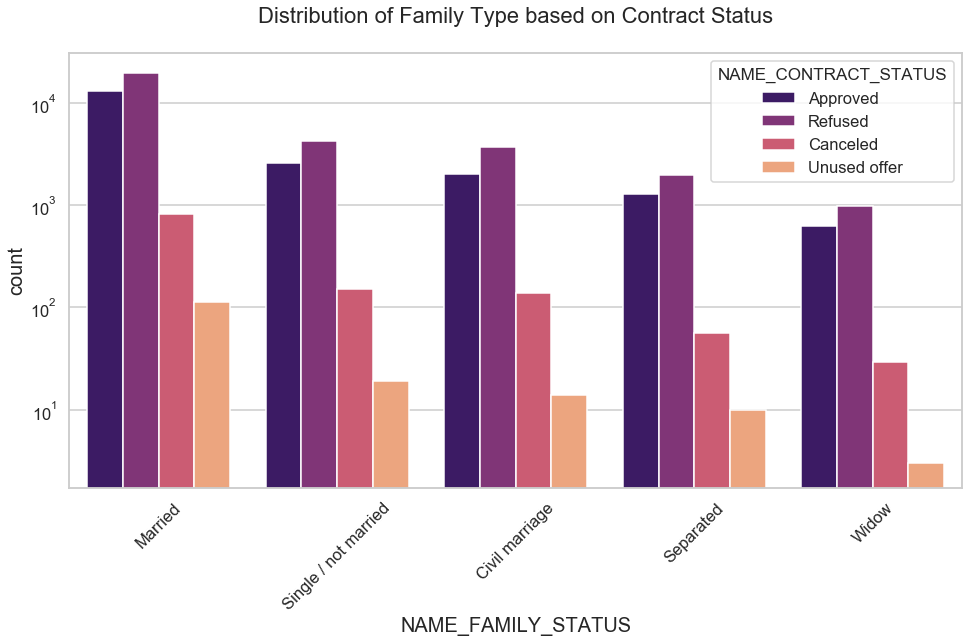

In [69]:
#COMPARING FAMILY TYPE WITH CONTRACT STATUS 
uniplot(combined,col='NAME_FAMILY_STATUS',title='Distribution of Family Type based on Contract Status',hue='NAME_CONTRACT_STATUS')

From the above plot , we can infer that married people have the most number of approved loans. 

We can also see that among the categories, only married people have more cancelled loans than refused loans.

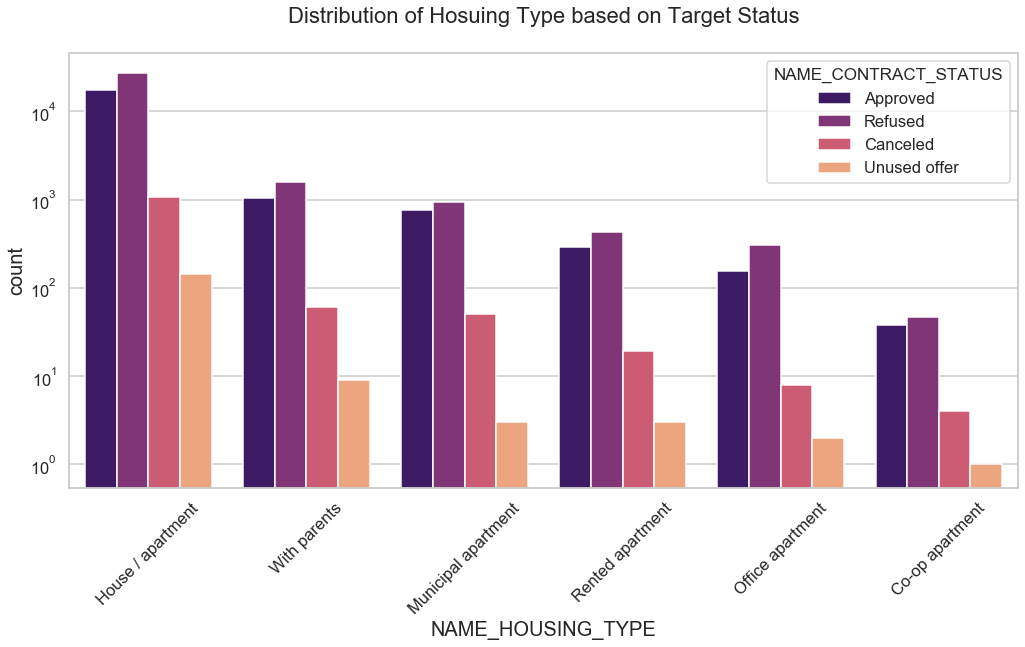

In [70]:
#COMPARING HOUSING TYPE WITH CONTRACT STATUS 
uniplot(combined,col='NAME_HOUSING_TYPE',title='Distribution of Hosuing Type based on Target Status',hue='NAME_CONTRACT_STATUS')

From the above plot, we can infer that people in House /apartment have the highest approved loans while co-op apartment has the lowest approved loans . 

We can also see that with parents, Rented apartments and Office apartment categories have more refused loans than cancelled loans.

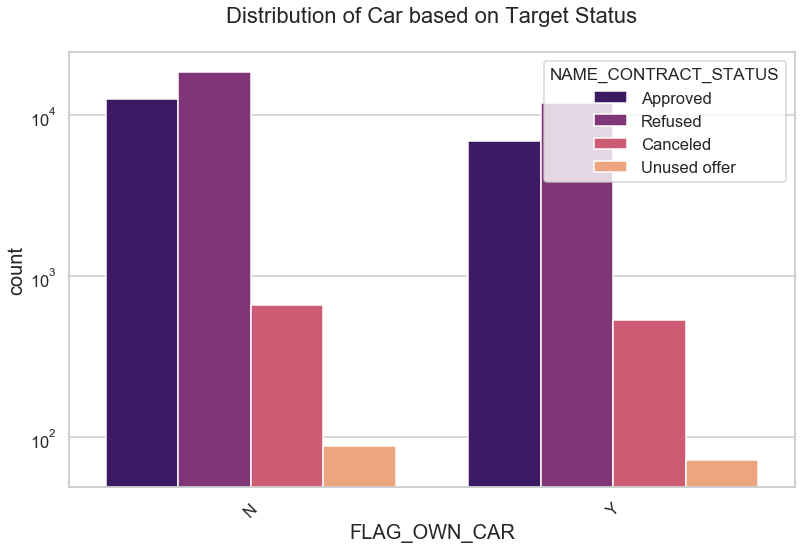

In [71]:
#COMPARING OWN CAR TYPE WITH CONTRACT STATUS 
uniplot(combined,col='FLAG_OWN_CAR',title='Distribution of Car based on Target Status',hue='NAME_CONTRACT_STATUS')

From the above this plot we can infer that people with no own car have more loans approved than people with own cars. 

People with own car have more refused contracts than cancelled contracts. 


# Bivariate Analysis

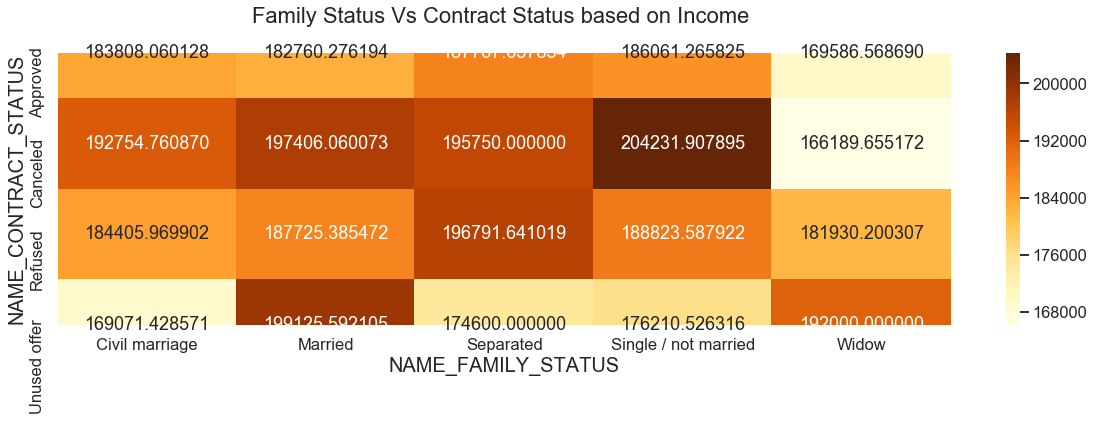

In [72]:
#Family Status Vs Contract Status bases on Income 
plt.figure(figsize=[20,5])
fam_cont_income=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "NAME_FAMILY_STATUS", values='AMT_INCOME_TOTAL')
plt.title('Family Status Vs Contract Status based on Income ')
sns.heatmap(fam_cont_income, annot= True ,cmap="YlOrBr", fmt= 'f' )
plt.show()

#### From the above plot , we can infer that Seperated people who refuesd have the highest income while widow with unused offer have the lowest income

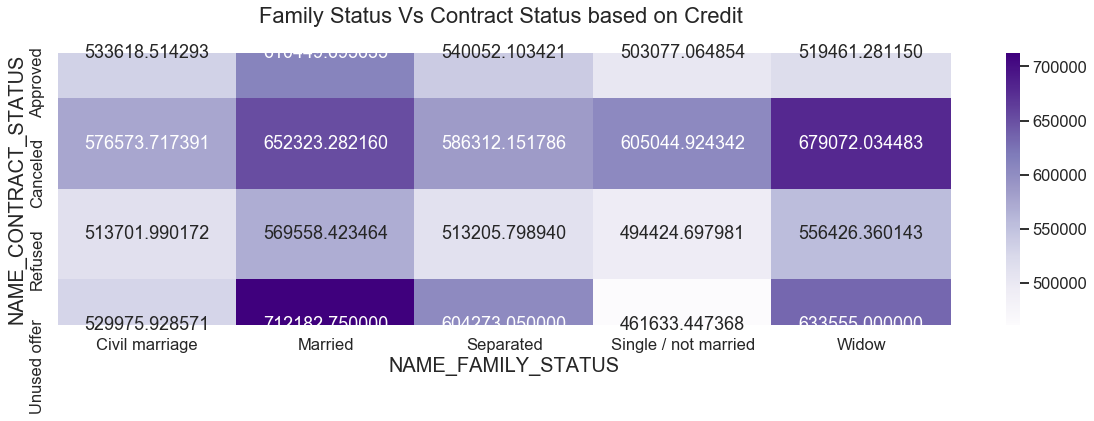

In [73]:
#Family Status Vs Contract Status based on Credit
plt.figure(figsize=[20,5])
fam_cont_cred=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "NAME_FAMILY_STATUS", values='AMT_CREDIT')
plt.title('Family Status Vs Contract Status based on Credit ')
sns.heatmap(fam_cont_cred, annot= True ,cmap="Purples", fmt= 'f' )
plt.show()

From the above plot, we can infer that Married people have more loan credit than other categories. 

The highest category is Married people with approved loan status. 

Single /not married is the category which has got the least credit.

The lowest category is single/not married with refused status. 

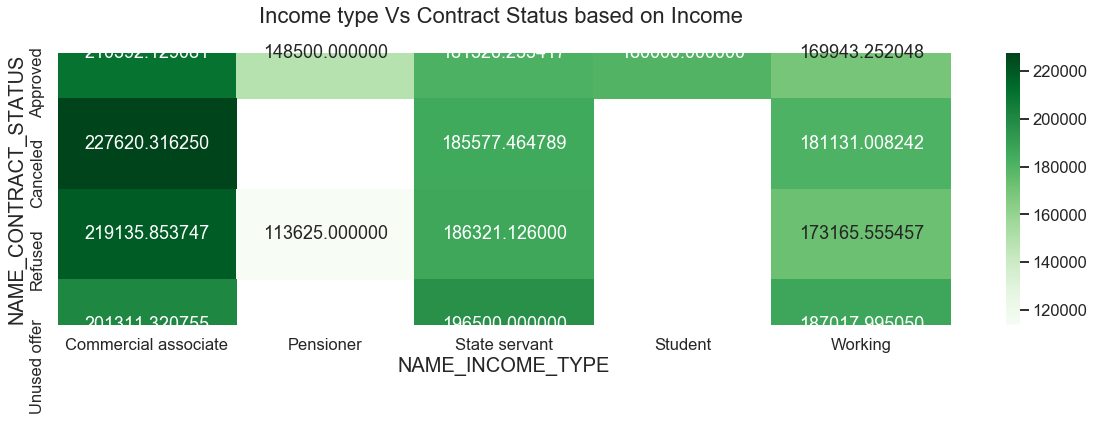

In [74]:
#Income type Vs Contract Status based on Income
plt.figure(figsize=[20,5])
inc_cont_income=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "NAME_INCOME_TYPE", values='AMT_INCOME_TOTAL')
plt.title('Income type Vs Contract Status based on Income ')
sns.heatmap(inc_cont_income, annot= True ,cmap="Greens", fmt= 'f' )
plt.show()

From the above plot, we can infer that commercial associate with refuesd status has the highest income while maternity leave with approved status has the lowest income.

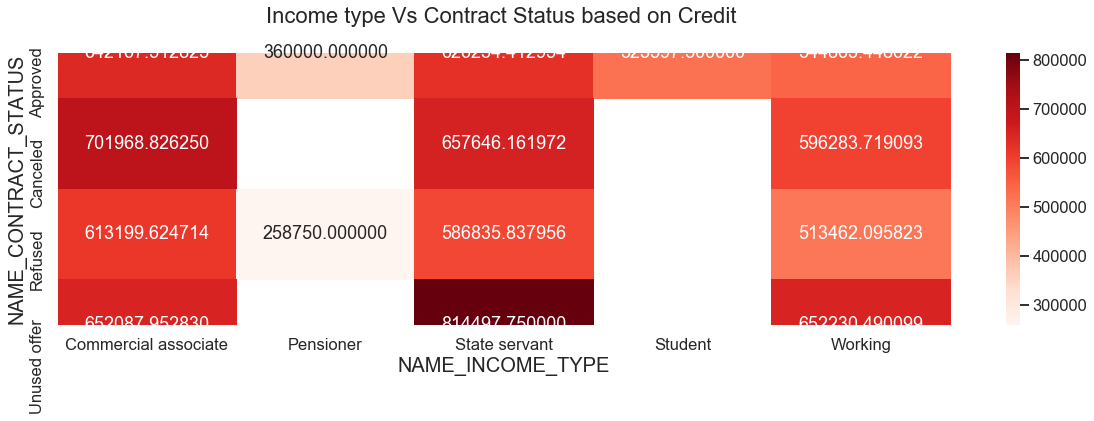

In [75]:
#Income type Vs Contract Status based on Credit 
plt.figure(figsize=[20,5])
inc_cont_credit=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "NAME_INCOME_TYPE", values='AMT_CREDIT')
plt.title('Income type Vs Contract Status based on Credit ')
sns.heatmap(inc_cont_credit, annot= True ,cmap="Reds", fmt= 'f' )
plt.show()

From the above plot, we can infer the maternity leave with cancelled , refused and unused contract has the highest credit. 

The least credit values is for student and refused contract category. 

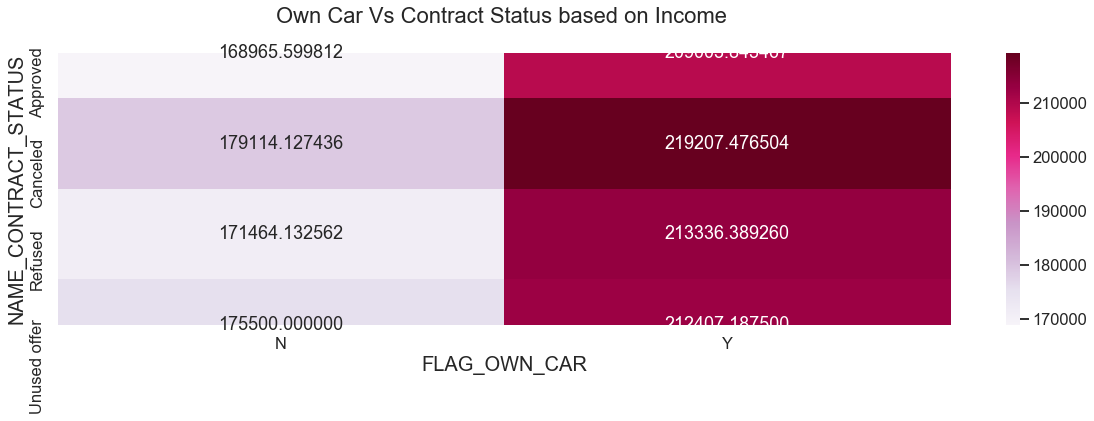

In [76]:
#Own Car Vs Contract Status based on Income 
plt.figure(figsize=[20,5])
car_cont_income=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "FLAG_OWN_CAR", values='AMT_INCOME_TOTAL')
plt.title('Own Car Vs Contract Status based on Income ')
sns.heatmap(car_cont_income, annot= True ,cmap="PuRd", fmt= 'f' )
plt.show()

From the above plot, we can infer that own car  and refused status category has the highest income . 

The lowest is the no own car and approved status category. 

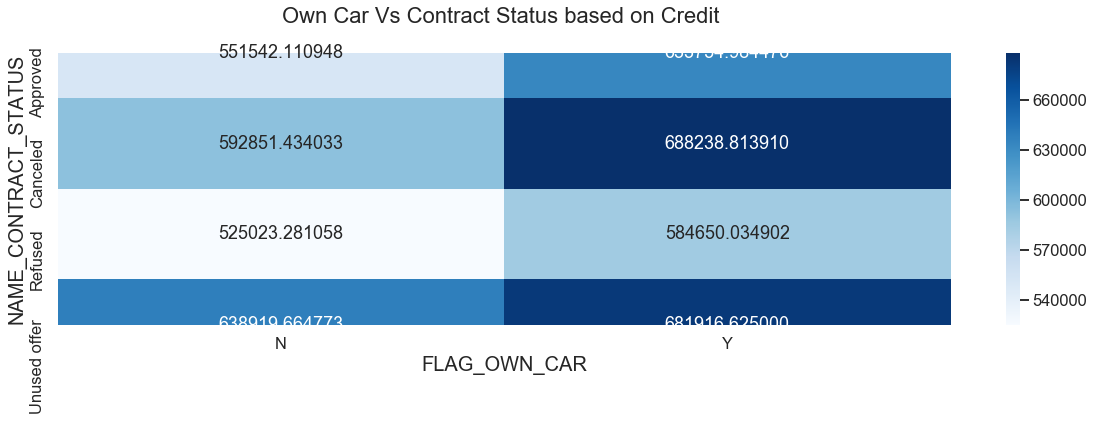

In [77]:
#Own Car Vs Contract Status based on Credit
plt.figure(figsize=[20,5])
car_cont_credit=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "FLAG_OWN_CAR", values='AMT_CREDIT')
plt.title('Own Car Vs Contract Status based on Credit ')
sns.heatmap(car_cont_credit, annot= True ,cmap="Blues", fmt= 'f' )
plt.show()

From the above plot, we can infer that own car and approved status has the highest credit. 

The lowest is the no own car and refused category.

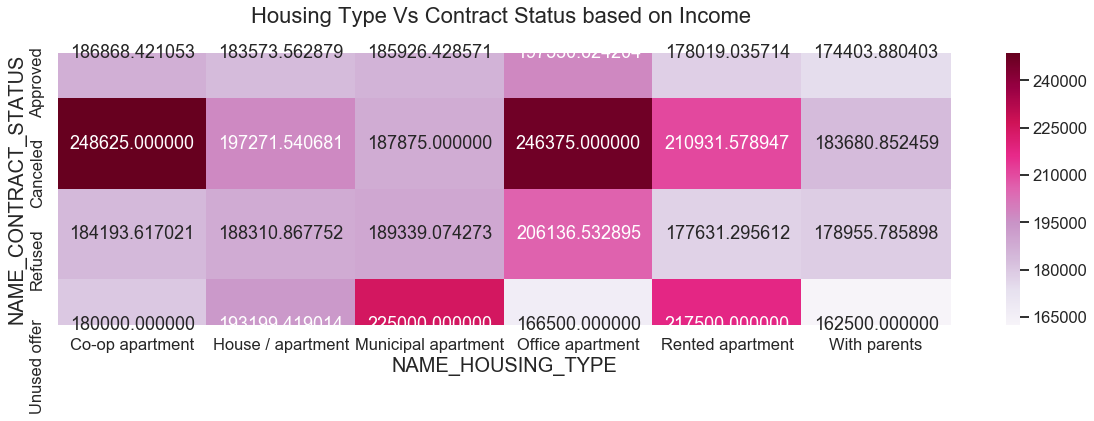

In [78]:
#Housing tupe Vs Contract Status based on Income 
plt.figure(figsize=[20,5])
house_cont_income=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "NAME_HOUSING_TYPE", values='AMT_INCOME_TOTAL')
plt.title('Housing Type Vs Contract Status based on Income ')
sns.heatmap(house_cont_income, annot= True ,cmap="PuRd", fmt= 'f' )
plt.show()

Form the above plot, we can infer that Office apartment with refused contract has the highest income .

The lowest is with parents and approved status. 

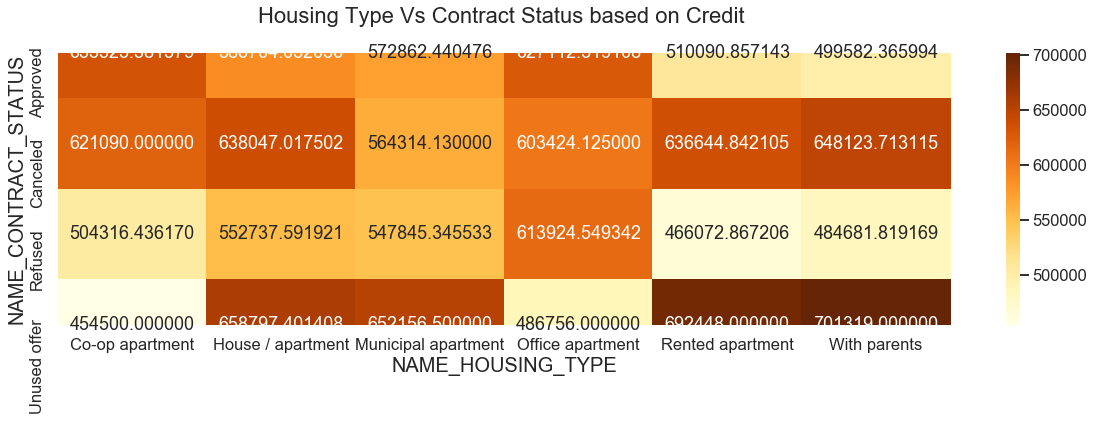

In [79]:
#Housing Type Vs Contract Status based on Credit
plt.figure(figsize=[20,5])
car_cont_credit=pd.pivot_table(data=combined, index ="NAME_CONTRACT_STATUS",columns = "NAME_HOUSING_TYPE", values='AMT_CREDIT')
plt.title('Housing Type Vs Contract Status based on Credit ')
sns.heatmap(car_cont_credit, annot= True ,cmap="YlOrBr", fmt= 'f' )
plt.show()

From the above plot, we can infer that office apartment with approved status has the most credit .

The lowest credit is the With parents and refused category.

## CONCLUSION
1 - Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

2 - Refused Status for Target 0 is high and it is a lost opportunity by missing out on good customers. Steps must be taken to know the reason behind it to get more insight.

3 - Business man with academic degree category must be targeted to credit loans as they have the most successful payments.

4 - Commercial associate with academic degree category must be handled with caution as they have highest credit among the target 1 categories.

5 - Businessman with resolving loans must be targeted as they have highest credit among target 0 categories.

6 - Maternity leave with cash loans must be handled with caution as they have the highest credit among the target 1 categories.
